In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


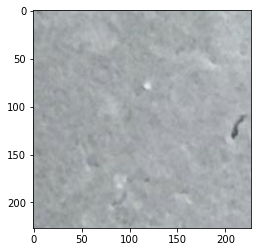

In [2]:
Datadir = 'F:/New folder (3)/Training_Concrete'
Categories = ['Neg','Pos']

for category in Categories:
    path = os.path.join(Datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break    
    

In [3]:
training_data = []

def create_training_data():
    for category in Categories:
        
        path = os.path.join(Datadir,category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                training_data.append([img_array,class_num]) 
            except Exception as e:
                pass
            
create_training_data()    

In [4]:
import random
random.shuffle(training_data)

In [5]:
X = []
y = []

for features,labels in training_data:
    X.append(features)
    y.append(labels)

In [6]:
X = np.array(X).reshape(-1,img_array.shape[0],img_array.shape[1],3)
y = np.array(y).reshape(1,-1)

In [7]:
x_flatten = X.reshape(X.shape[0],-1).T
train_x = x_flatten/255

In [8]:
def initialize_params(n):
    W = {}
    b = {}
    
    for l in range(1,len(n)):
        W['W' + str(l)] = np.random.randn(n[l],n[l-1]) * np.sqrt(2/n[l-1])
        b['b' + str(l)] = np.zeros((n[l] , 1))
        
    parameters =( W , b)
    
    return parameters
        
        

In [9]:
def sigmoid (x):
    s = 1/(1 + np.exp(-x))
    return s

In [10]:
def relu (x):
    r = np.maximum(0,x)
    return r

In [11]:
def linear_function(W , x, b):
    Z = np.dot(W,x) + b
    return Z

In [12]:
def forward_prop(W,b,n,x):
    Z = {}
    A = {}
    
    for l in range(len(n)):
        if l == 0:
            A['A' + str(l)] = x
        elif  l < len(n):
            Z['Z' + str(l)] = linear_function(W['W' + str(l)], A['A' + str(l-1)], b['b' + str(l)])
            A['A' + str(l)] = relu(Z['Z' + str(l)])
        elif l == (len(n)-1):
            Z['Z' + str(l)] = linear_function(W['W' + str(l)], A['A' + str(l-1)], b['b' + str(l)])
            A['A' + str(l)] = sigmoid(Z['Z' + str(l)])
    return Z,A
            
        
    

In [13]:
y.shape[1]


616

In [14]:
def cost_func(A,y):
    m = y.shape[1]
    logprobs = np.multiply(np.log(A),y) + np.multiply(np.log(1 - A), 1 - y)
    
    cost =- (1./m * np.sum(logprobs))
   
    return cost

In [21]:
def backward_prop(X,y,W,b,Z,A,n,lambd):
    dZ= {}
    db= {}
    dW= {}
    m = y.shape[1]
    
    for i in reversed (range(1,len(n))):
        if i == len(n)-1:
            dZ['dZ' + str(i)] = A['A' + str(i)] - y
            dW['dW' + str(i)] =((np.dot(dZ['dZ' + str(i)],A['A' + str(i-1)].T))*(1./m)) + ((lambd/m)* W['W' + str(i)])
            db['db' + str(i)] = np.sum(dZ['dZ' + str(i)], axis=1, keepdims=True)
        elif i == 1:
            dZ['dZ' + str(i)] = np.multiply(np.dot(W['W' + str(i+1)].T,dZ['dZ' + str(i+1)]),np.int64(A['A' + str(i)]>0))
            dW['dW' + str(i)] =((np.dot(dZ['dZ' + str(i)],X.T))*(1./m)) + ((lambd/m)* W['W' + str(i)])
            db['db' + str(i)] = np.sum(dZ['dZ' + str(i)], axis=1, keepdims=True)
        else:
            dZ['dZ' + str(i)] = np.multiply(np.dot(W['W' + str(i+1)].T,dZ['dZ' + str(i+1)]),np.int64(A['A' + str(i)]>0))
            dW['dW' + str(i)] =((np.dot(dZ['dZ' + str(i)],A['A' + str(i-1)].T))*(1./m)) +((lambd/m)* W['W' + str(i)])
            db['db' + str(i)] = np.sum(dZ['dZ' + str(i)], axis=1, keepdims=True)
            
    return db,dW


In [ ]:
#n = [5 , 4, 3, 2, 1]
#W,b = initialize_params(n)
#x = np.random.rand(5,10)
#Z, A = forward_prop(W,b,n,x)
#y = np.random.rand(1,10)
#db,dW = backward_prop(x,y,W,b,Z,A,n)

In [19]:
def update_params(W,b,db,dW,learning_rate):
    for i in range(1,len(n)):
        W['W' + str(i)] = W['W' + str(i)] - learning_rate * dW['dW' + str(i)] 
        b['b' + str(i)] = b['b' + str(i)] - learning_rate * db['db' + str(i)] 
    return W,b

In [27]:
n = [154587,15,10,5,1]
def DNN_model(train_x,y,n):
    learning_rate = 0.01
    iters = 500
    L2 = 0
    lambd = 0.08
    m = y.shape[1]
    W,b = initialize_params(n)
    for i in range(iters):
        Z,A = forward_prop(W,b,n,train_x)
        for i in range(1,len(n)):
            L2 += np.sum(np.square(W['W' + str(i)]))
        cost = cost_func(A['A' + str(len(n)-1)],y) + ((lambd/(2*m))*(L2))
        if i % 50 == 0:
            print('cost = ' + str(cost))
        db,dW = backward_prop(train_x,y,W,b,Z,A,n,lambd)
        W,b = update_params(W,b,db,dW,learning_rate)
        
    return A

A = DNN_model(train_x,y,n)
    

<ipython-input-14-0c9edb96dd91>:3: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A),y) + np.multiply(np.log(1 - A), 1 - y)
<ipython-input-14-0c9edb96dd91>:3: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(np.log(A),y) + np.multiply(np.log(1 - A), 1 - y)
<ipython-input-14-0c9edb96dd91>:3: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(np.log(A),y) + np.multiply(np.log(1 - A), 1 - y)


In [28]:
def predict(A,y,train_x):
        m = train_x.shape[1]
        Y_prediction = np.zeros((1,m), dtype = np.int)

        
    
        for i in range(A["A4"].shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
            if (A["A4"][0,i] < 0.5):
                Y_prediction[0,i] = 0
            else:
                Y_prediction[0,i] = 1 
        return Y_prediction

In [29]:
Y_prediction = predict(A,y,train_x)

print(100 - np.mean(np.abs(Y_prediction - y)) * 100)

50.0


In [4]:
def rander():
    s = np.random.rand(1,2)
    print(s)
    return s

sr = rander()
print(sr)

[[0.71425424 0.16842169]]
[[0.71425424 0.16842169]]


In [6]:
python -m pip install --upgrade pip

SyntaxError: invalid syntax (<ipython-input-6-0a8cf7b99133>, line 1)

In [8]:
pip install cv2


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [9]:
pip install opencv-python -i http://pypi.douban.com/simple/ --trusted-host pypi.douban.com

Looking in indexes: http://pypi.douban.com/simple/
Note: you may need to restart the kernel to use updated packages.


In [4]:
import random
random.seed(1)
print(random.random())
random.seed(1)
print(random.random())

0.13436424411240122
0.13436424411240122
